# Lesson 1 - Overview

__Definition of Unsupervised Learning__: You have no outcome variable. So what _are_ you looking for?

1. Clustering the data
2. Determining variable importance/variable's influence on other variables (through PCA)
3. Determining latent variables (variables inferred through actual variables in the data) (through neural networks)

### How does one "evaluate" a feature space when there is no outcome variable?

Most of the time, the evaluation step is simply skipped for these kinds of models. However, you can hypothesize what you want to observe and see if the data supports that.

Likewise, without evaluation, it is difficult to determine a stopping condition. Just something to be aware of...

# Lesson 2 - Clustering

Two kinds of grouping:
1. __Hard Clustering__: Assigning each data point to a single specific cluster.
2. __Soft Clustering__: Each point is assigned a "degree of membership" for every cluster.

#### Things to do Before Getting to Clustering
1. Normalize the data so everything is on the same playing field.
2. Determine parameters for clustering. Setting too many clusters leads to overfitting. Setting too few clusters won't yield much significant data. 
    - You can avoid this by clustering _hierarchically_. For example, for young men, old men, young women, old women, you can do for basic clusters, then cluster against variables (i.e., either young vs. old or men vs. women).

[ALSO, check out this link for helpful info moving forward!](https://github.com/Tinsae/Thinkful-Data-Science/blob/master/DS/Unit%204/4.2.3%2BThree%2BOther%2BClustering%2BMethods.ipynb)

In [1]:
# BASIC CLUSTERING EXAMPLE:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
'''
We will be doing "K-Means" clustering, 
where "K" is the number of central points of clusters you want to use.
-Picking K is essentially a trial and error process.
-K-Means algorithm is an iterative process - it generates new means from the clusters
and works off of those new means.
'''

# Dataset is Heart Disease data

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


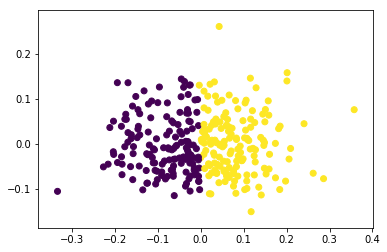

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# (1) Normalize and 
# (2) reduce data to desired number of feature-dimensions via PCA.

X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

# PCA spreads data out (as a result of lower dimensionality, don't ask)
# Normalizing is just needed (don't ask) - it will throw a ValueError otherwise.

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y)) # pandas version of confusion_matrix


This means that 120 (65+55) data points were not identified consistently. We can use "MiniKBatchMeans" to do the iterations subset sample-wise.

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        2  154
1      147    0


In [5]:
# Yielded significant computational speed improvement but 
# degraded our model to it being useless.

### Clustering Methods other than K-Means - Mean-Shift, Spectral, and Affinity Clustering

Going to work with three "blobs" to explain these three clustering methods (there are many more, but these are the alternative ones).

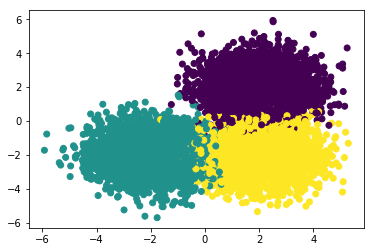

In [6]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

# IMPORTANT: We don't need to normalize the blobs as make_blobs makes
# blobs that are pre-normalized!!!!

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### Mean-Shift
Instead of a simple 2D space, K-Means-Shift determines kernel density peaks of probability of point positions in an n-dimensional space. The model iterates over and over, slowly pushing points to the nearest cluster peak.

The main parameter for Means-Shift is __bandwidth__. Higher bandwidth means smaller peaks, as the peaks are more smoothed out. Lower bandwidth means more peaks. Bandwidth is from 0 to 1.

#### Specifics to this Model

Because it's an n-dimensional space, Means-Shift is good for multiple feature clustering. The downside to this is that it's SLOWWWWWW, so recommended for small to medium-sized datasets only.

Also, unlike _all other clustering models_, if a point is too far away to categorize, it won't cluster it. Whether it will cluster it or not depends on parameters, threshold level, number of iterations, etc.

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


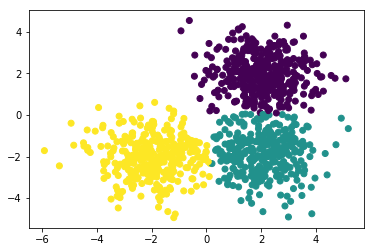

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### Spectral Clustering

The idea: clustering based upon _similarity_ in the data (good for image recognition and social network categorization). 

This process is done by "pair-wise" similarity, a/k/a SLOWWWW!

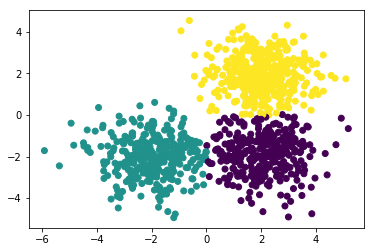

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5    0  357
1        9  310    1
2      306    5    7


In [15]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

### Affinity Propagation

Similar to Spectral in that it determines cluster points based upon similarity. Different from Spectral and K-Means in that _the model_ determines how many cluster points there should be (and the groupings may be uneven in size).

Two parameters to know: (1) __availability__: how well a data point should a data point be for determining whether it should be a cluster point candidate, and (2) __responsibility__: how well-suited each data point is to become a member of the "exemplar" data point's cluster. 

This process is memory intensive, as it needs to hold the data to make those comparisons. Thus, it is SLOWWWW.

In [16]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


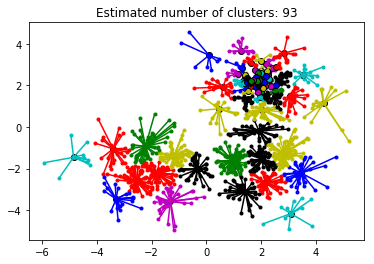

In [17]:
# graphing "93" clusters!

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Overall:
Use K-Means for simple and quick observations with low clusters. <br>
Use Means-Shift for simple and quick observations with high number of clusters. <br>
Use Spectral clustering for a more advanced estimation of clusters. <br>
Use Affinity propagation when the estimated number of clusters is high, for example if there is a lot of deviation/overlap in the data.

# A Bonus by Yours Truly - The Hierarchical Dendrogram

Different than means clustering as this takes a "bottom-up" approach, with each variable beginning in a separate cluster, and each step, they converge. This continues until they all converge into one cluster. 

__Advantages:__ The bottom-up approach results in a more explanatory, more intuitive clustering model, plus we don't need to calculate how many clusters are needed beforehand.

__Disadvantages:__  Hierarchical dendrograms can only handle a few data points, with processing time exponentially increasing with more observations.

In [ ]:
# HIERARCHICAL DENDROGRAM EXAMPLE
# taken from http://2datascientist.blogspot.com/2017/03/clustering-using-python.html

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
# SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so we need to use the 
# normalize() function from sklearn.preprocessing instead of Normalizer.

# Import normalize
from sklearn.preprocessing import normalize
# Normalize the movements: normalized_movements
normalized_movements = normalize(sample_data)
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')


# Plot the dendrogram, using varieties as labels
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)
plt.show()

---
# A Second Bonus - t-SNE Clustering

Much of the clustering is done by _linear projection_, which, if the data isn't linear, definitely throws a wrench into the system. Thankfully, __t-Distributed Stochastic Neighbor Embedding (t-SNE)__ is a non-linear method of clustering.

__Advantages:__ <br>
- t-SNE performs its own dimensionality reduction. PCA is a linear projection of the data. As stated above, t-SNE creates a low-dimensionsal mapping of non-linear structured data. The stochastic gradient modeling approach takes a global look at the data and thus ignores the linear thinking of finding a "clear line between which points are neighbors."

    - t-SNE is great for high-dimensional data (vectorized text data, much???)


- PCA-ing high-dimensional data causes overcrowding in the clustering (known as _the curse of dimensionality_). t-SNE's Gaussian "t-distribution" prevents overcrowding. 


- Stochastic gradient descent modeling also is conducive to non-linear data.


__Disadvantages:__ <br>
- Like other stochastic gradient descent models, the model can prematurely converge on local minima, making its output inaccurate.

    - For this reason, it is important to run it multiple times with no `random_state` hyperparameter.


- PCA is simpler (more intuitive) and faster. It also retains the variance proportions between the data. t-distribution does not.

    - On that note, when someone asks, "Why did you PCA the clustering data?", you can easily answer: "That's what maintains the most variance."!!!!!
    
- How it works is measures _pair-wise_ distributions within original data features and distributions of a lower-dimensional representation of the original distribution. It then calculates a way that best matches these two distributions. This is extremely computationally heavy, and so _very_ high dimensional space (vectorized text data, much???) may make this method computationally prohibitive.
    - To get around this, you can use another dimensionality reduction method (`PCA` for dense data or `TruncatedSVD` for sparse data) _before_ running it through this clustering model.

In [ ]:
# t-SNE MODELING EXAMPLE
# taken from: 
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

time_start = time.time()

# model instantiation
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# n_components (Default:2) --> number of dimensions to reduce to
# perplexity (Default:30) --> the t-SNE analog to no. of clusters 
           # Normal values range 5 to 50 (but can be as low as 2)
# early_exaggeration (Default:12) --> controls how "tight" the clusters are and how much space are between clusters

'''
If you get a \'strange ball' output with uniformly distributed points,
your perplexity is too high.
'''
# get features/labels
tsne_results = tsne.fit_transform(data_subset) # specifically spliced down to ONLY 10000 samples

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
'''
NOTE: For a sample set of 784 dimensions (28x28 images), it took ~157 seconds to run to completion.
For 20000 datapoints with 784 dimensions, t-SNE takes ~1172 seconds (~19.5 minutes).

Hyperparameter 'method'=
='barnes-hut' (default parameter) runs in O(NlogN) time
='exact' is more exact but runs in O(N^2) time
'''

#----------------------------------------------------------------
#----------------------------------------------------------------

# plotting
# for 2D graphs, choose two tsne resulting features to graph:

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()

#-----------------------------------------------------------------
# compare the above graph with PCA results to see the difference

# setting up PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#----------------
#plotting PCA results against t-SNE results 
# (This is an optional analysis - you can just use the t-SNE plot alone for graphing purposes)

df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

# PCA=2
plt.figure(figsize=(16,4))
ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full", # or set to: True
    alpha=0.3,
    ax=ax1
)
# can also add labels:
  # plt.title('t-SNE Results: df_train', weight='bold').set_fontsize('14')
  # plt.xlabel('t-SNE-reduced Dimension 1', weight='bold').set_fontsize('10')
  # plt.xlabel('t-SNE-reduced Dimension 2', weight='bold').set_fontsize('10')

# 3D graph of ax1 data, for fun
#PCA=3
from mpl_toolkits.mplot3d import Axes3D
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
# if that doesn't work, do:    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax2.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax2.set_xlabel('pca-one')
ax2.set_ylabel('pca-two')
ax2.set_zlabel('pca-three')

#t-SNE plot
ax3 = plt.subplot(2, 2, 3)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax4
)

plt.show()

### Clustering Evaluation

__Question:__ How do you know how many clusters to use in a clustering model?

__Answer:__ find consistency among sub-folds (uh doiiii).

Three methods to score clustering (besides looking at rough graphing):
1. Contingency Tables - The pd.crosstabs we have been using.
2. Rand Index - Comparing baseline cluster points with new cluster points, measuring counts of accurate relationships.

In [18]:
# example of Rand Index analysis:
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
c = list(itertools.product(y, full_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print(RIscore)

NameError: name 'full_pred' is not defined

3. Adjusted Rand Index - Same as Rand Index, but sets baseline score against the bias of getting a good score due to "random" clustering assignments. NEVER use Rand Index - only ARI.

In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(y, full_pred)

## Other metrics (in addition to Adjusted Rand Index):

__Silhouette score:__ Measures how accurate the clustering is <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html <br>
`from sklearn.metrics import silhouette_score` <br>
`print(silhouette_score(X, kmeans.labels_))`

_Can also USe "KElbowVisualizer" to maximize the silhouette score!_

`# Import the KElbowVisualizer method ` <br>
`from yellowbrick.cluster import KElbowVisualizer`

`# Instantiate a scikit-learn K-Means model` <br>
`model = KMeans(random_state=0)`

`# Instantiate the KElbowVisualizer with the number of clusters and the metric` <br>
`visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)`

`# Fit the data and visualize` <br>
`visualizer.fit(X)` <br>
`visualizer.poof()` <br>

__Pd.Crosstab:__ Useful in analyzing the accuracy of the clusters (ideally you want one cluster to have all the row values in one particular row, and the rest of the row values are zero ---> if the crosstab counts are about even across rows, your cluster is not good)

__Looking at Individual Datapoints:__ There is no "point" in clustering if you don't know what is being clustered where. Below is example code:

```
estimator = KMeans(n_clusters=3) estimator.fit(X)

estimator.labels_ # gives array indicating the data's assignments to which clusters (e.g., array([1,0,0,2,0,1,3,0...]))

{i: np.where(estimator.labels_ == i)[0] for i in range(estimator.n_clusters)}

#^^^^^gets the indices of points for each cluster
```

# ONE FINAL NOTE ON CLUSTERING 
## The Need to Reduce Dimensionality!

### (See also: Summary example below)

As you can imagine, whether it be clustering, supervised model graphing, or any other graphing, dimensionality reduction is essential - after all, we only graph in 2D (sometimes 3).  What are methods to reduce dimensionality?

 - __Principal Component Analysis (PCA):__ shown above. Common, easy, fast, and most importantly, maintains variance in the data.
 
 
 - __Linear Discriminant Analysis (LDA):__ used via sklearn's `TruncatedSVD()`. This works with highly dimensional but sparse data. This is critical when you are trying to cluster vectorized text data...which is highly dimensional and sparse...
 
 
  - __Canonical Correlation Analysis (CCA):__ Analyzes pair-wise the similarities and variances of two random features. Pair-wise computations are NEVER good for high-dimensional feature space (i.e., in instances when the number of pair-wise permutations is high).
  
  
PCA, LDA, and CCA also yield the benefit of reconciling imbalanced/highly variant data.
 
 
 - __t-distributed Stochastic Neighbor Embedding (t-SNE):__ Explained above. Fantastic option for when you need a projection for non-linear data.
 
 
 - __Localality-Sensitive Hashing:__ Bins data by approximate location within the feature space such that spatially similar items end up under the same hash key. Good for high-dimensional feature space.
 
 
 - __Random Projection:__ The name is self-explanatory: it takes higher-dimensional data and projects it to a lower dimension "by some random projection matrix" (kinda black box-y). There is a trade-off between preserving pair-wise distances between observations and the number of output dimensions in the lower dimensional space.
 
 
As you can imagine (which is ironic given that I used that clause already - have I no imagination?), some of these methods are good for feature selection in addition to feature space reduction. Some of these methods may be _more_ suitable for feature selection than feature space reduction. "As you can imagine," you can get creative with pipelines of this stuff!

## A Final Summary on Clustering:

In [ ]:
# Comprehensive K-Means cluster (but applies to many other clustering algorithms)
# http://2datascientist.blogspot.com/2017/03/clustering-using-python.html

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create scaler: scaler
scaler = StandardScaler()

# can also normalize if you have small dataset
# often you don't, so ALWAYS use standardscaler (or a similar scaler!!!!!)
X_norm = normalize(X)

# To speed up analysis if feature space is gigantic, use PCA
from sklearn.decomposition import PCA

X_pca = PCA(2).fit_transform(X_feature_space)

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=5)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Calculate the cluster labels: labels - THIS IS THE OUTPUT YOU ARE LOOKING AT!!!!!!!!!!!!********
labels = pipeline.predict(X_feature_space) # (or X_pca if you used it)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)


# can also plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

## Lesson 3 - Neural Networks (Finally!)

### Perceptron Models

__Definition:__ An algorithm that classifies by "minimizing the error for a classifier".  What does that mean? We'll see in the following example:

In [19]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [20]:
# Import Perceptron.
from sklearn.linear_model import Perceptron

# Establish X and Y.
X = test_data[['test', 'project']]
Y = test_data['pass']

# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
perceptron = Perceptron(n_iter=10000)

# Fit Perceptron.
perceptron.fit(X, Y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, Y)))

Score: 1.0


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


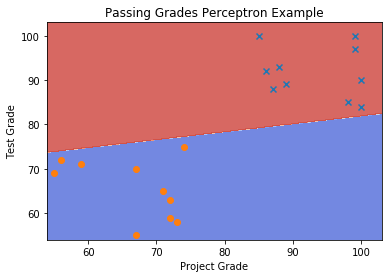

In [24]:
# Establish a mesh for our plot.
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

# Predict over that mesh.
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')


# Reshape the prediction to be plottable.
Z = Z.reshape(xx.shape)

# Plot the mesh.
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot our two scatters.
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

# Aesthetics.
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades Perceptron Example')
plt.show()

#### How is this different from an SVM?

SVMs attempt to maximize the margins between differently classified points. A Perceptron model stops as soon as the error of the different classifications reaches zero - as it has done here; all points are correctly classified, so it does not need to do anything else. This makes the perceptron model faster. Otherwise, the perceptron would keep iterating to minimize the classification error.

Because perceptron models don't give the _best_ classification setup, it's not as good of a model as others that exist (such as SVM). However, perceptron models are good basic models to be used for ensemble boosting models.

### Introduction to Neural Networks

__How it Works:__ Perceptrons are laid out in layers, with each layer being hundreds to thousands of perceptrons. Each perceptron attributes a specific weight to the input and feeds it into other perceptrons for analysis. This setup can be used as either a classifier or regression model.

In [25]:
# Example of a neural network
# Using New York's Museum of Modern Art Public Dataset

artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [27]:
# processing the data...
# selecting columns to use:

artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()

In [28]:
# good to check the data types for these rows

artworks.dtypes

Artist           object
Nationality      object
Gender           object
Date             object
Department       object
DateAcquired     object
URL                bool
ThumbnailURL       bool
Height (cm)     float64
Width (cm)      float64
dtype: object

In [29]:
# converting "DateAcquired" to a date-time int type
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [30]:
# miscellaneous cleaning, courtesy of Thinkful

# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], axis=1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

__Goal of this Model:__ See if we can predict which department a piece of artwork is supposed to go to, using the department as the Y (of course).

In [31]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.**************
# This may take several minutes to run.****************

# Import the model.
from sklearn.neural_network import MLPClassifier #mlp = multi-layer perceptron

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
mlp.score(X, Y)

0.7796845837999253

In [33]:
Y.value_counts()/len(Y)

Drawings & Prints        0.621874
Photography              0.227417
Architecture & Design    0.113177
Painting & Sculpture     0.033893
Media and Performance    0.003639
Name: Department, dtype: float64

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=4)

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 